In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Równanie drgań
$$
\frac{d^2x(t)}{dt^2} + \omega^2x(t) + \beta \frac{dx(t)}{dt} = F(t)
$$

## Różniczki

$$
\frac{dx(t)}{dt} = f(t,x,v) = v(t) \\
\frac{dv(t)}{dt} = g(t,x,v) = -\omega^2x(t) - \beta v(t) + F(t)
$$

## RK4

In [2]:
parameters = {"omega": 1.0, "beta": 0.0, "Omega": 0.0, "f0": 0}

def F(f_0,Omega,t):
    return f_0 * np.cos(Omega * t)

def calc_k(t,x,v,dt, parameters):
    omega = parameters["omega"]
    beta = parameters["beta"]
    Omega = parameters["Omega"]
    f0 = parameters["f0"]

    k_1x = v
    k_1v = -(omega*omega)*x - beta*v + F(f0,Omega,t)

    k_2x = v + dt/2*k_1v
    k_2v = -(omega*omega) * (x + dt/2 * k_1x) - beta*(v + dt/2 * k_1v) + F(f0, Omega,t + 0.5*dt)

    k_3x = v + dt / 2 * k_2v
    k_3v = -(omega*omega) * (x + dt / 2 * k_2x) - beta * (v + dt / 2 * k_2v) + F(f0, Omega, t + 0.5 * dt)

    k_4x = v + dt * k_3v
    k_4v = -(omega*omega) * (x + dt * k_3x) - beta * (v + dt * k_3v) + F(f0, Omega, t + dt)

    return [k_1x, 2*k_2x,2*k_3x, k_4x], [k_1v, 2*k_2v,2*k_3v,k_4v]


def RK4_step(t,x,v,dt,parameters):

    kx, kv = calc_k(t,x,v,dt,parameters)

    next_x = x + dt/6*sum(kx)
    next_v = v + dt/6*sum(kv)

    return next_x, next_v

def RK_4(T,x0,v0,dt,parameters):

    x = [x0]
    v = [v0]

    for t in T[1:]:
        next_x, next_v = RK4_step(t,x[-1],v[-1],dt,parameters)
        x.append(next_x)
        v.append(next_v)

    return np.array(x),np.array(v)


## RK4 Parametry

In [3]:
dt = 10e-4
T0 = 2*np.pi/parameters['omega']

t = np.arange(start=0.0, stop=4*T0 + dt, step=dt)
t

array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 2.5131e+01, 2.5132e+01,
       2.5133e+01], shape=(25134,))

### Funkcja do Rysowania

In [4]:
def plot_xv(t,x,v,T0, title):
    f, ax = plt.subplots(figsize=(10, 6))

    ax.plot(t,x, color='y', label='x(t)')
    ax.plot(t,v, color='b', label='v(t)')

    ax.axvline(0, color='r', linestyle='dashed')
    ax.axvline(T0, color='r', linestyle='dashed')
    ax.axvline(2*T0, color='r', linestyle='dashed')
    ax.axvline(3*T0, color='r', linestyle='dashed')

    ax.grid(True)
    ax.legend(loc='upper right')
    ax.set_xlim((-1,26))
    ax.set_xlabel("t-czas")
    ax.set_ylabel("x(t), v(t)")
    ax.set_title(f"{title}")

    return ax

def plot_energies(t,x,v,T0, k,m, title):
    Ep = 0.5*k*np.array([x_i*x_i for x_i in x])
    Ek = 0.5*m*np.array([v_i*v_i for v_i in v])
    E_tot = Ep + Ek

    f, ax = plt.subplots(figsize=(10, 6))

    ax.plot(t,Ep, color='y', label='Ep(t)')
    ax.plot(t,Ek, color='b', label='Ek(t)')
    ax.plot(t,E_tot, color='m', label='E_tot(t)')

    ax.axvline(0, color='r', linestyle='dashed')
    ax.axvline(T0, color='r', linestyle='dashed')
    ax.axvline(2*T0, color='r', linestyle='dashed')
    ax.axvline(3*T0, color='r', linestyle='dashed')

    ax.grid(True)
    ax.legend(loc='upper right')
    ax.set_xlim((-1,26))
    ax.set_xlabel("t-czas")
    ax.set_ylabel("Ek(t), Ep(t), E_tot(t)")
    ax.set_title(f"{title}")


    return ax




# Drgania Swobodone

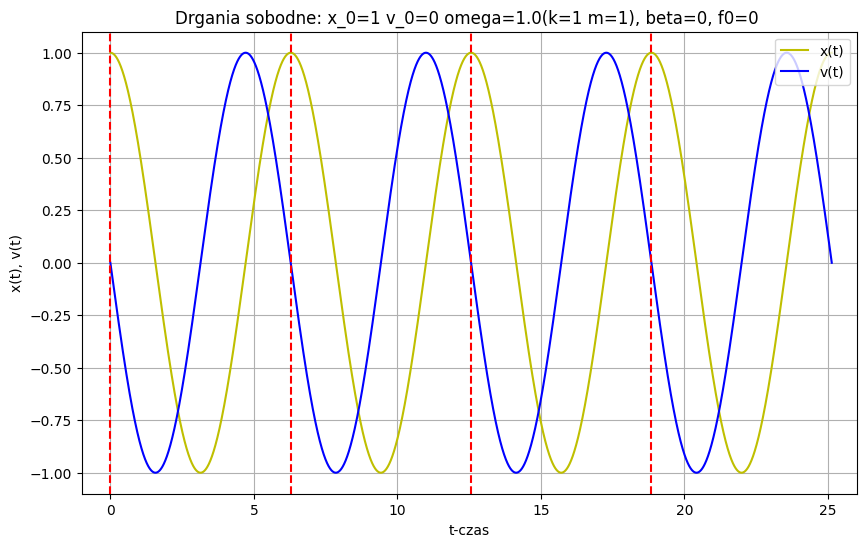

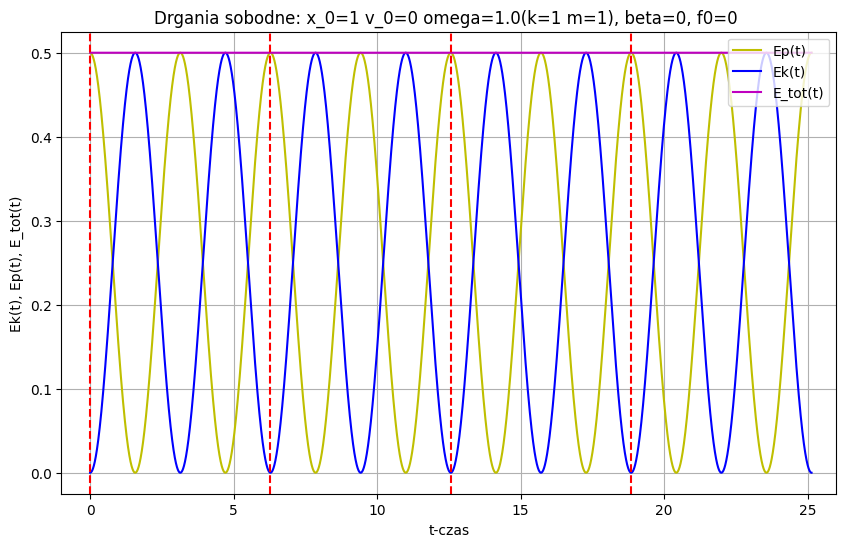

In [5]:
x_0, v_0, k, m, beta, Omega, f0 = 1, 0, 1,1, 0, 0,0
parameters["omega"] = np.sqrt(k/m)
parameters["beta"] = beta
parameters["Omega"] = Omega
parameters["f0"] = f0

x,v = RK_4(t,x_0, v_0, dt,parameters)

title = f"Drgania sobodne: {x_0=} {v_0=} omega={k/m}({k=} {m=}), {beta=}, {f0=} "

plot_xv(t,x,v,T0, title)
plt.show()

plot_energies(t,x,v,T0, k, m, title)
plt.show()


## Drgania tłumione

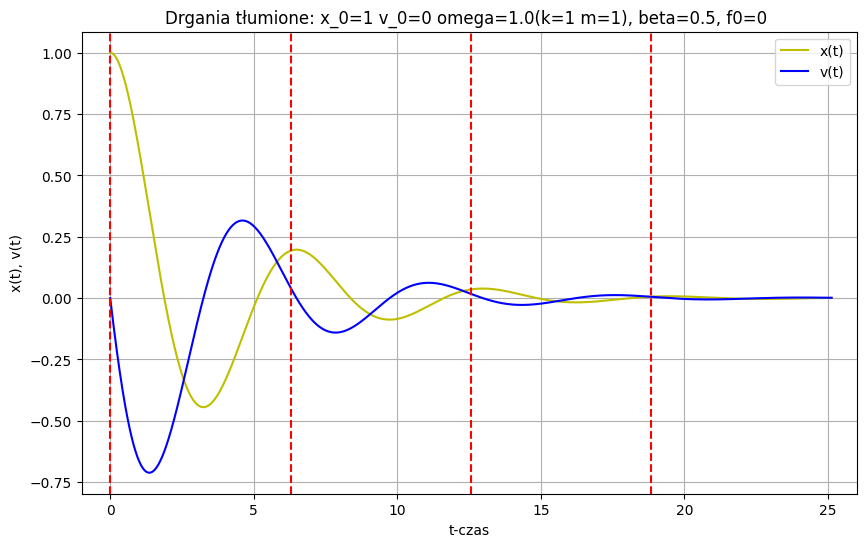

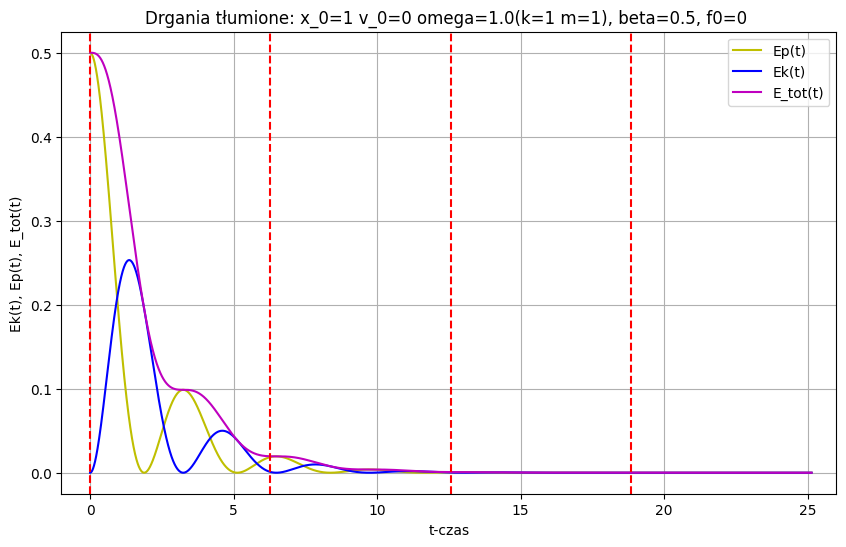

In [6]:
x_0, v_0, k, m, beta, Omega, f0 = 1, 0, 1,1, 0.5, 0,0
parameters["omega"] = np.sqrt(k/m)
parameters["beta"] = beta
parameters["Omega"] = Omega
parameters["f0"] = f0

x,v = RK_4(t,x_0, v_0, dt,parameters)

title = f"Drgania tłumione: {x_0=} {v_0=} omega={k/m}({k=} {m=}), {beta=}, {f0=} "
plot_xv(t,x,v,T0, title)
plt.show()

plot_energies(t,x,v,T0, k, m, title)
plt.show()

## Drgania wymuszone

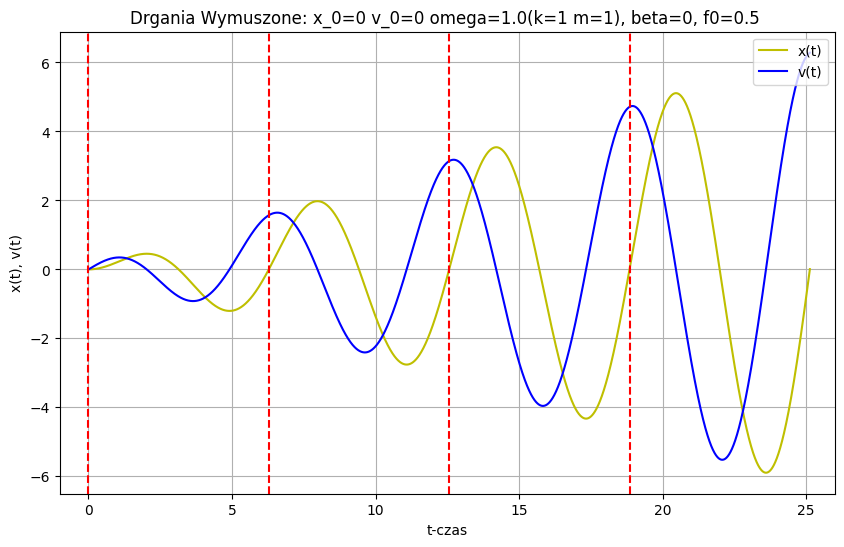

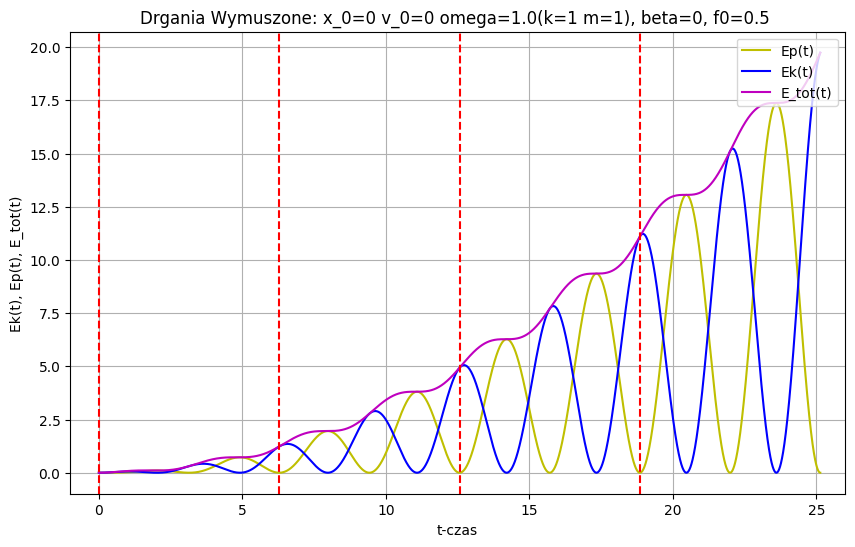

In [7]:
x_0, v_0, k, m, beta, Omega, f0 = 0, 0, 1,1, 0, 1 ,0.5
parameters["omega"] = np.sqrt(k/m)
parameters["beta"] = beta
parameters["Omega"] = Omega
parameters["f0"] = f0

x,v = RK_4(t,x_0, v_0, dt,parameters)

title = f"Drgania Wymuszone: {x_0=} {v_0=} omega={k/m}({k=} {m=}), {beta=}, {f0=} "
plot_xv(t,x,v,T0, title)
plt.show()

plot_energies(t,x,v,T0, k, m, title)
plt.show()

## Wymuszenie i tłumienie

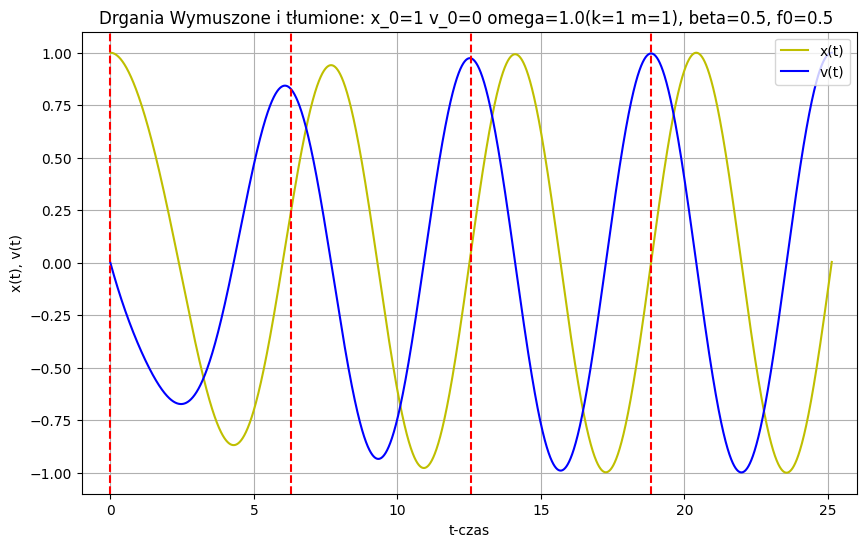

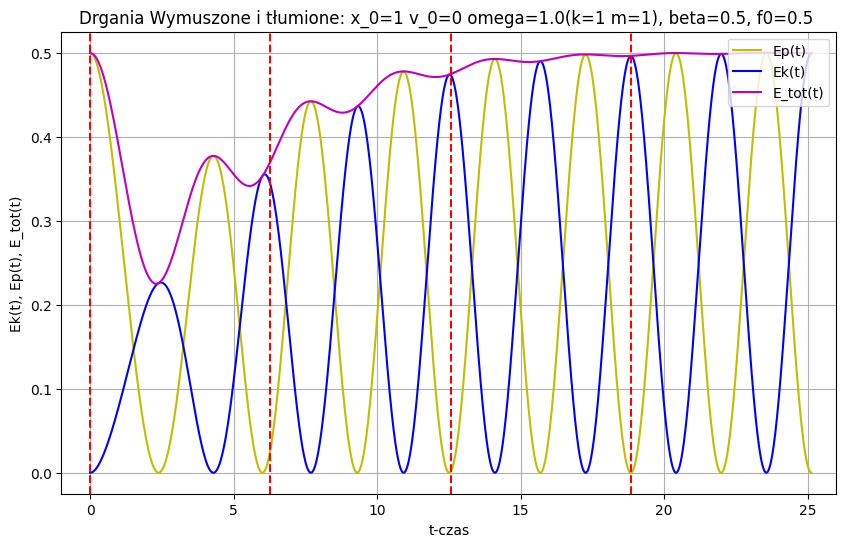

In [8]:
x_0, v_0, k, m, beta, Omega, f0 = 1, 0, 1,1, 0.5, 1,0.5
parameters["omega"] = np.sqrt(k/m)
parameters["beta"] = beta
parameters["Omega"] = Omega
parameters["f0"] = f0

x,v = RK_4(t,x_0, v_0, dt,parameters)

title = f"Drgania Wymuszone i tłumione: {x_0=} {v_0=} omega={k/m}({k=} {m=}), {beta=}, {f0=} "
plot_xv(t,x,v,T0, title)
plt.show()

plot_energies(t,x,v,T0, k, m, title)
plt.show()